# COVID-19 Cases in The United States and Territories vs Worldwide

![title](image.png)

The data being reviewed for this project shows COVID-19 cases worldwide from January 20, 2020 through June 1, 2020. However, this data analysis project does a comparison of positive case in the United States and territories with other countries.

The main comparisons are:
- Positive cases in the US and Worldwide
- Recovered cases in the US and Worldwide
- Deaths in the US and Worldwide

After doing the analysis, I came to the conclusion that positive cases in the United States were significantly higher than all countries combined. However, testing was widely available in the United States in comparison to the rest of the world at the beginning of the pandemic. In addition, while "Positive" cases were a lot higher than "Recovered" cases, the analyst that initially studied the data referred other analysts to an article from Nate Silver with Five Thirty Eight about how positive COVID-19 cases need to be taken with a grain of salt.

Original dataset:
https://www.kaggle.com/datasets/lin0li/covid19testing

Additional Source:
https://fivethirtyeight.com/features/coronavirus-case-counts-are-meaningless/

* This data analysis is my final project for Code Louisville - Data Analysis 1

## Importing data to notebook

Requirement 1: Read in data

In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [284]:
covid_df = pd.read_csv('covid19.csv')

## Data Cleaning Process

Requirement 2: Manipulate and clean data

Using .head( ) and .tail( ) methods to make sure all dataframe is being imported from top to bottom

In [285]:
covid_df.head(100)

,Date,Continent_Name,Two_Letter_Country_Code,Country_Region,Province_State,positive,hospitalized,recovered,death,total_tested,active,hospitalizedCurr,daily_tested,daily_positive
0,2020-01-20,Asia,KR,South Korea,All States,1,0,0,0,4,0,0,0,0
1,2020-01-22,North America,US,United States,All States,1,0,0,0,1,0,0,0,0
2,2020-01-22,North America,US,United States,Washington,1,0,0,0,1,0,0,0,0
3,2020-01-23,North America,US,United States,All States,1,0,0,0,1,0,0,0,0
4,2020-01-23,North America,US,United States,Washington,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2020-01-31,Oceania,AU,Australia,Northern Territory,0,0,0,0,0,0,0,0,0
96,2020-01-31,Oceania,AU,Australia,Queensland,2,0,0,0,0,0,0,0,0
97,2020-01-31,Oceania,AU,Australia,South Australia,0,0,0,0,0,0,0,0,0
98,2020-01-31,Oceania,AU,Australia,Tasmania,0,0,0,0,0,0,0,0,0


In [286]:
covid_df.tail(2)

,Date,Continent_Name,Two_Letter_Country_Code,Country_Region,Province_State,positive,hospitalized,recovered,death,total_tested,active,hospitalizedCurr,daily_tested,daily_positive
10901,2020-06-01,Asia,TW,Taiwan,All States,0,0,0,0,72319,0,0,237,0
10902,2020-06-01,Asia,VN,Vietnam,All States,0,0,0,0,261004,0,0,0,0


After further analysis, I noticed that some data was duplicated. For example, there were rows showing cases per state, but also rows showing cases for all states. I dropped "All State" values

In [287]:
covid_df = covid_df[covid_df['Province_State'] != 'All States'].drop('Province_State', axis=1)

In [288]:
covid_df.head()

,Date,Continent_Name,Two_Letter_Country_Code,Country_Region,positive,hospitalized,recovered,death,total_tested,active,hospitalizedCurr,daily_tested,daily_positive
2,2020-01-22,North America,US,United States,1,0,0,0,1,0,0,0,0
4,2020-01-23,North America,US,United States,1,0,0,0,1,0,0,0,0
7,2020-01-24,North America,US,United States,1,0,0,0,1,0,0,0,0
9,2020-01-25,Oceania,AU,Australia,0,0,0,0,0,0,0,0,0
10,2020-01-25,Oceania,AU,Australia,3,0,0,0,0,0,0,0,0


Using .shape method to have a better idea of the number of columns and rows of the dataframe. This means there is a total of 7,122 rows and 13 columns

In [289]:
covid_df.shape

(7122, 13)

Using .info( ) method to check if any important values are missing. However, I see that I have a complete dataframe.

In [290]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7122 entries, 2 to 10893
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Date                     7122 non-null   object
 1   Continent_Name           7122 non-null   object
 2   Two_Letter_Country_Code  7122 non-null   object
 3   Country_Region           7122 non-null   object
 4   positive                 7122 non-null   int64 
 5   hospitalized             7122 non-null   int64 
 6   recovered                7122 non-null   int64 
 7   death                    7122 non-null   int64 
 8   total_tested             7122 non-null   int64 
 9   active                   7122 non-null   int64 
 10  hospitalizedCurr         7122 non-null   int64 
 11  daily_tested             7122 non-null   int64 
 12  daily_positive           7122 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 779.0+ KB


Below you will see the list of all columns to determine if anything needs to be changed

In [291]:
covid_df.columns

Index(['Date', 'Continent_Name', 'Two_Letter_Country_Code', 'Country_Region',
       'positive', 'hospitalized', 'recovered', 'death', 'total_tested',
       'active', 'hospitalizedCurr', 'daily_tested', 'daily_positive'],
      dtype='object')

Created a dictionary to change 2 column names

In [292]:
covid_df.rename(columns={
    'Continent_Name': 'Continent',
    'Two_Letter_Country_Code': 'Country_Code'
}, inplace=True)

In [293]:
covid_df.columns

Index(['Date', 'Continent', 'Country_Code', 'Country_Region', 'positive',
       'hospitalized', 'recovered', 'death', 'total_tested', 'active',
       'hospitalizedCurr', 'daily_tested', 'daily_positive'],
      dtype='object')

This list was created to capitlize the first letter of each word

In [294]:
covid_df.columns = ['Date', 'Continent', 'Country_Code', 'Country_Region',
       'Positive', 'Hospitalized', 'Recovered', 'Death', 'Total_Tested',
       'Active', 'HospitalizedCurr', 'Daily_Tested', 'Daily_Positive']

In [295]:
covid_df.columns

Index(['Date', 'Continent', 'Country_Code', 'Country_Region', 'Positive',
       'Hospitalized', 'Recovered', 'Death', 'Total_Tested', 'Active',
       'HospitalizedCurr', 'Daily_Tested', 'Daily_Positive'],
      dtype='object')

After going through this cleaning, I realized I wanted to drop some columns to make analysis easier

In [296]:
covid_df.drop(['Country_Code', 'Hospitalized', 'Total_Tested', 'Active', 'HospitalizedCurr', 'Daily_Tested', 'Daily_Positive'], axis=1, inplace=True )


In [297]:
covid_df.head()

,Date,Continent,Country_Region,Positive,Recovered,Death
2,2020-01-22,North America,United States,1,0,0
4,2020-01-23,North America,United States,1,0,0
7,2020-01-24,North America,United States,1,0,0
9,2020-01-25,Oceania,Australia,0,0,0
10,2020-01-25,Oceania,Australia,3,0,0


## Data Analysis

Requirement 3: Analyse data

In [298]:
covid_df.describe()

,Positive,Recovered,Death
count,7122.000000,7122.000000,7122.000000
mean,9728.641112,1717.688711,510.995928
std,31344.190075,6141.974108,1940.770732
min,0.000000,0.000000,0.000000
25%,29.000000,0.000000,0.000000
50%,697.000000,0.000000,12.000000
75%,6228.750000,569.500000,188.000000
max,370770.000000,65934.000000,23905.000000


Continent column has 3 unique values, top value is North America, which shows up 6078 times. In other words, North America has the higher positive COVID-19 cases

In [299]:
covid_df['Continent'].describe()

count              7122
unique                3
top       North America
freq               6078
Name: Continent, dtype: object

In [300]:
covid_df.corr()

,Positive,Recovered,Death
Positive,1.000000,0.791042,0.982478
Recovered,0.791042,1.000000,0.813024
Death,0.982478,0.813024,1.000000


Below you will the the total of positive cases, recovered cases and deaths in the United States and other countries as well.

65,531,389 positive cases inthe United States vs 3,755,993 positive cases in other countries

In [301]:
US = covid_df.loc[covid_df['Country_Region'] == 'United States', 'Positive'].sum()
US

65531389

In [302]:
Other = covid_df.loc[covid_df['Country_Region'] != 'United States', 'Positive'].sum()
Other

3755993

10,548,079 recovered in United States vs 1,685,300 recovered in other countries

In [303]:
US = covid_df.loc[covid_df['Country_Region'] == 'United States', 'Recovered'].sum()
US

10548079

In [304]:
Other = covid_df.loc[covid_df['Country_Region'] != 'United States', 'Recovered'].sum()
Other

1685300

3,423,630 deaths happened in the United States vs 215,683 deaths in other countries

In [305]:
US = covid_df.loc[covid_df['Country_Region'] == 'United States', 'Death'].sum()
US

3423630

In [306]:
Other = covid_df.loc[covid_df['Country_Region'] != 'United States', 'Death'].sum()
Other

215683

## Visualization

Requirement 4 and 5: Visualize data and interpret data

As seen below, there is Positive cases in the United States were extremely high in comparison to other countries. However, one thing to notice is that although many people recovered from COVID-19, there is a huge gap between positive cases and recovered cases. 

After further research, I came across an article that was mentioned in Kaggle, where I got the dataframe from, where the author mentions that positive cases are meaningless without understanding testing. Furthermore, there is a chance that not all who tested positive followed up with the testing facility after their quarantine time to see if they were still testing positive or if they would test negative.

In addition to all of this, positive cases were very high in the United States since testing was more available here in comparison to other countries.

Source:https://fivethirtyeight.com/features/coronavirus-case-counts-are-meaningless/

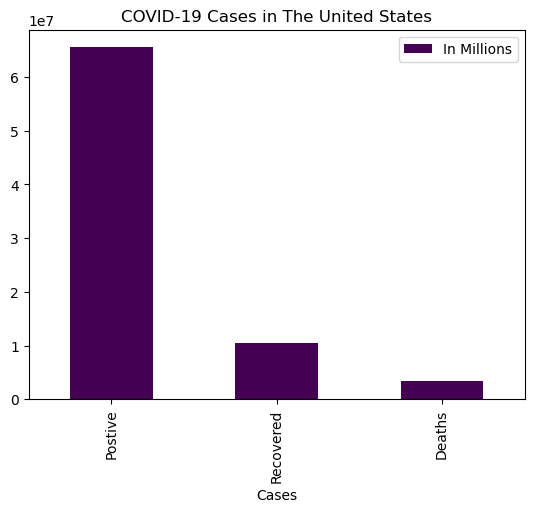

In [307]:
US = {'Cases' : ['Postive', 'Recovered', 'Deaths'],
    'In Millions' : [65531389, 10548079, 3423630]}
data = pd.DataFrame(US)
data.plot(kind='bar', x='Cases', title = 'COVID-19 Cases in The United States', colormap = 'viridis');


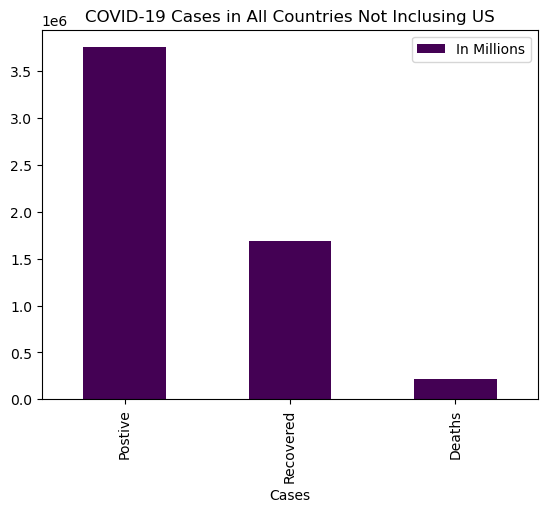

In [308]:
Other = {'Cases' : ['Postive', 'Recovered', 'Deaths'],
    'In Millions' : [3755993, 1685300, 215683]}
data = pd.DataFrame(Other)
data.plot(kind='bar', x='Cases', title = 'COVID-19 Cases in All Countries Not Inclusing US', colormap = 'viridis');


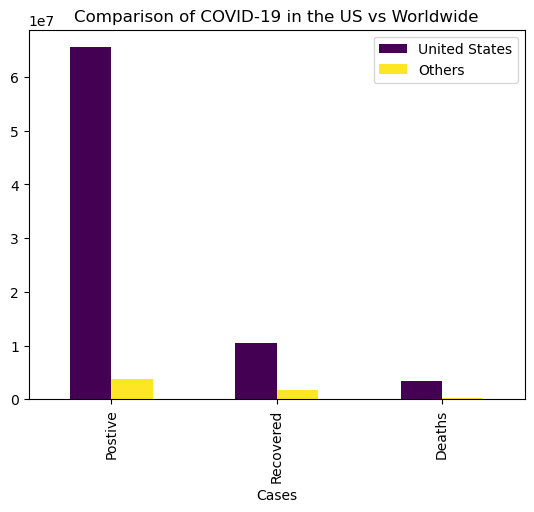

In [309]:
All = {'Cases' : ['Postive', 'Recovered', 'Deaths'],
    'United States' : [65531389, 10548079, 3423630],
        'Others' : [3755993, 1685300, 215683]}
data = pd.DataFrame(All)
data.plot(kind='bar', x='Cases', title = 'Comparison of COVID-19 in the US vs Worldwide', colormap = 'viridis');